## Найти **датасет с изображениями**, на котором привести инверсию по каждому цветовому каналу

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Загрузка датасета
uploaded = files.upload()

# Путь к загруженному файлу
dataset_path = list(uploaded.keys())[0]

# Распаковка датасета
!unzip $dataset_path -d /content/dataset

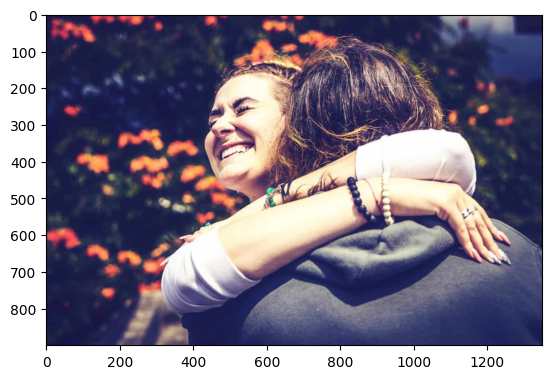

In [57]:
import os
import random

file_list = os.listdir('/content/dataset/data/Happy')
random_file = random.choice(file_list)
file_path = os.path.join('/content/dataset/data/Happy', random_file)

img = plt.imread(file_path)
plt.imshow(img)

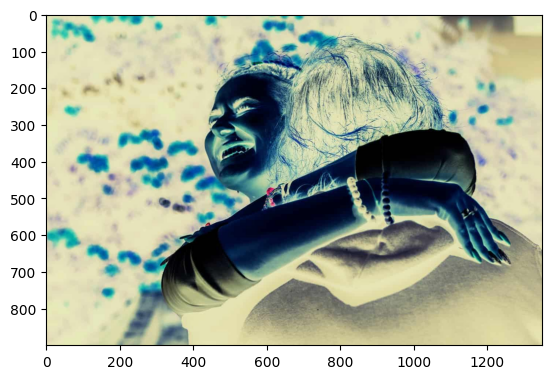

In [63]:
inverted_image = img.copy()
inverted_image[inverted_image < 256] = 255 - inverted_image[inverted_image < 256]
plt.imshow(inverted_image)

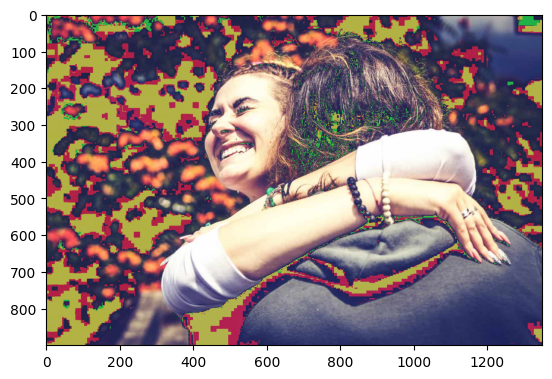

In [68]:
img_copy = img.copy()
img_copy[img_copy < 30] = 178
plt.imshow(img_copy)

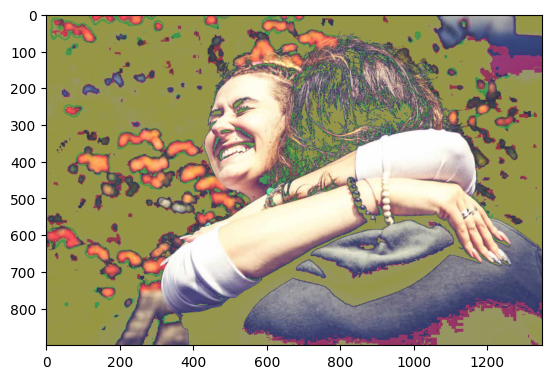

In [75]:
img_copy = img.copy()
img_copy[img_copy < 50] = 150
plt.imshow(img_copy)

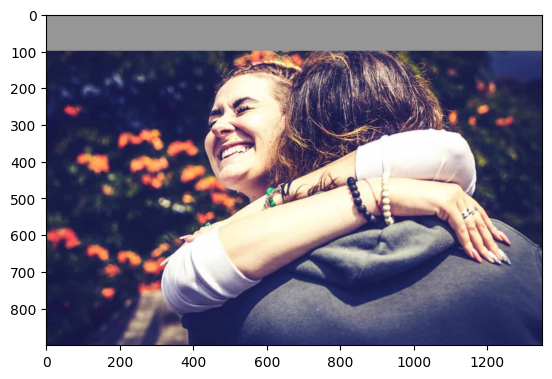

In [90]:
img_copy = img.copy()
img_copy[:100] = 150
plt.imshow(img_copy)


## Используя **датасет Титаник**, Попробовать самостоятельно изучить датасет и посчитать базовые метрики (среднее, сумма, частота, количество пропусков и тд)

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv("/content/titanic/train.csv")

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
# средний, минимальный и максимальный возраст в зависимости от пола

df[["Age", "Sex"]].groupby("Sex").agg(["mean", "min", "max"])

Age            
             mean   min   max
Sex                          
female  27.915709  0.75  63.0
male    30.726645  0.42  80.0

In [83]:
# средняя, минимальная и максимальная стоимость билета в зависимости от пола

df[["Fare", "Sex"]].groupby("Sex").agg(["mean", "min", "max"])

Fare                
             mean   min       max
Sex                              
female  44.479818  6.75  512.3292
male    25.523893  0.00  512.3292

In [84]:
# средняя, минимальная и максимальная стоимость билетов в зависимости от класса

df[["Fare", "Pclass"]].groupby("Pclass").agg(["mean", "min", "max"])

Fare               
             mean  min       max
Pclass                          
1       84.154687  0.0  512.3292
2       20.662183  0.0   73.5000
3       13.675550  0.0   69.5500

<Axes: xlabel='Pclass'>

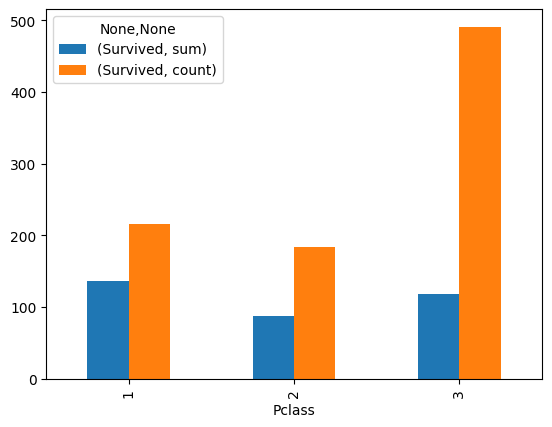

In [85]:
# количество выживших и общее количество пассажиров по классу

df_by_class = df[["Pclass", "Survived"]].groupby("Pclass").agg(["sum", "count"])
df_by_class.plot.bar()

In [86]:
# количество выживших и общее количество по месту посадки


df[["Embarked", "Survived"]].groupby("Embarked").agg(["sum", "count"])

Survived      
              sum count
Embarked               
C              93   168
Q              30    77
S             217   644

<Axes: xlabel='Age'>

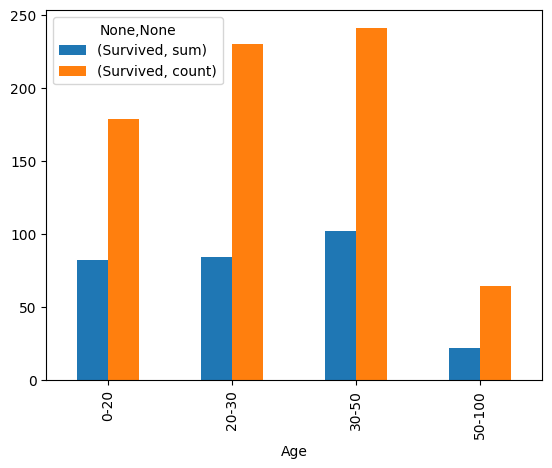

In [87]:
# количество выживших и общее количество пассажиров по возрасту

df_copy = df.copy()

df_copy["Age"] = pd.cut(df_copy["Age"], bins = [0, 20, 30, 50, 100], labels=['0-20', '20-30', '30-50', '50-100'])

df_copy[["Age", "Survived"]].groupby("Age").agg(["sum", "count"]).plot.bar()

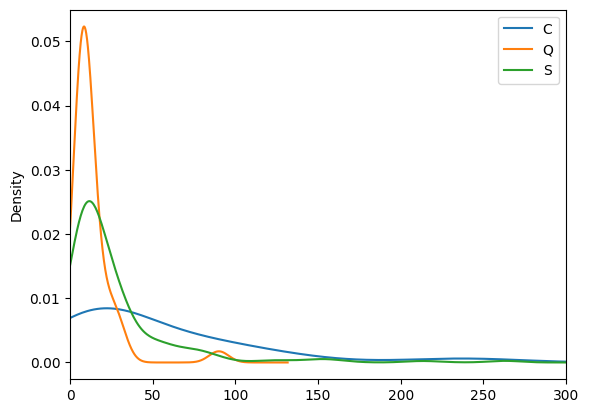

In [88]:
# сопоставить fare и embarked

# Группировка по столбцу 'Embarked' и построение графиков плотности для каждой группы
groups = df.groupby('Embarked')
fig, ax = plt.subplots()

for name, group in groups:
    group['Fare'].plot.density(label=name, ax=ax)

ax.set_xlim(0, 300)
# Отображение легенды и графиков
plt.legend()
plt.show()

Доп. задание Найти супружеские пары, дети-родители, братья-сестры, используя имеющиеся колонки.

In [97]:
df_name = df[["Name", "SibSp", "Parch", "Sex", "Age"]][df.Parch > 0]
df_name.sort_values("Name")

,Name,SibSp,Parch,Sex,Age
746,"Abbott, Mr. Rossmore Edward",1,1,male,16.00
279,"Abbott, Mrs. Stanton (Rosa Hunt)",1,1,female,35.00
855,"Aks, Mrs. Sam (Leah Rosen)",0,1,female,18.00
305,"Allison, Master. Hudson Trevor",1,2,male,0.92
297,"Allison, Miss. Helen Loraine",1,2,female,2.00
...,...,...,...,...,...
318,"Wick, Miss. Mary Natalie",0,2,female,31.00
856,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,1,female,45.00
377,"Widener, Mr. Harry Elkins",0,2,male,27.00
155,"Williams, Mr. Charles Duane",0,1,male,51.00


In [92]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])